In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
file_path = r"../data/BTCUSDT_1m/raw/BTCUSDT_1m_data.csv"

In [3]:
df = pd.read_csv(file_path)
df.columns

Index(['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
       'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume',
       'Taker Buy Quote Asset Volume', 'Ignore'],
      dtype='object')

In [4]:
price_change = df["Close"] - df["Open"]

In [5]:
import numpy as np
import pandas as pd

def clean_outliers(data, global_thresh=3, window_size=30, local_threshold=3, fill_method="mean"):
    res = data.copy()
    # Calculate z-score for global outliers
    z_global = np.abs((res - res.mean()) / res.std())
    global_outliers = np.argwhere(z_global > global_thresh).flatten()

    # Replace global outliers with mean or median
    if fill_method == "mean":
        global_fill_value = res.mean()
    elif fill_method == "median":
        global_fill_value = res.median()
    else:
        raise ValueError("Invalid fill_method. Choose 'mean' or 'median'.")
    res[global_outliers] = global_fill_value

    # Calculate z-score for local outliers using sliding window
    local_outliers = []
    for i in range(len(res) - window_size + 1):
        window = res[i:i+window_size]
        z_local = np.abs((window - window.mean()) / window.std())
        local_outliers.extend(np.argwhere(z_local > local_threshold).flatten() + i)

    # Replace local outliers with mean or median
    res[local_outliers] = global_fill_value

    return res, np.concatenate((global_outliers, local_outliers))


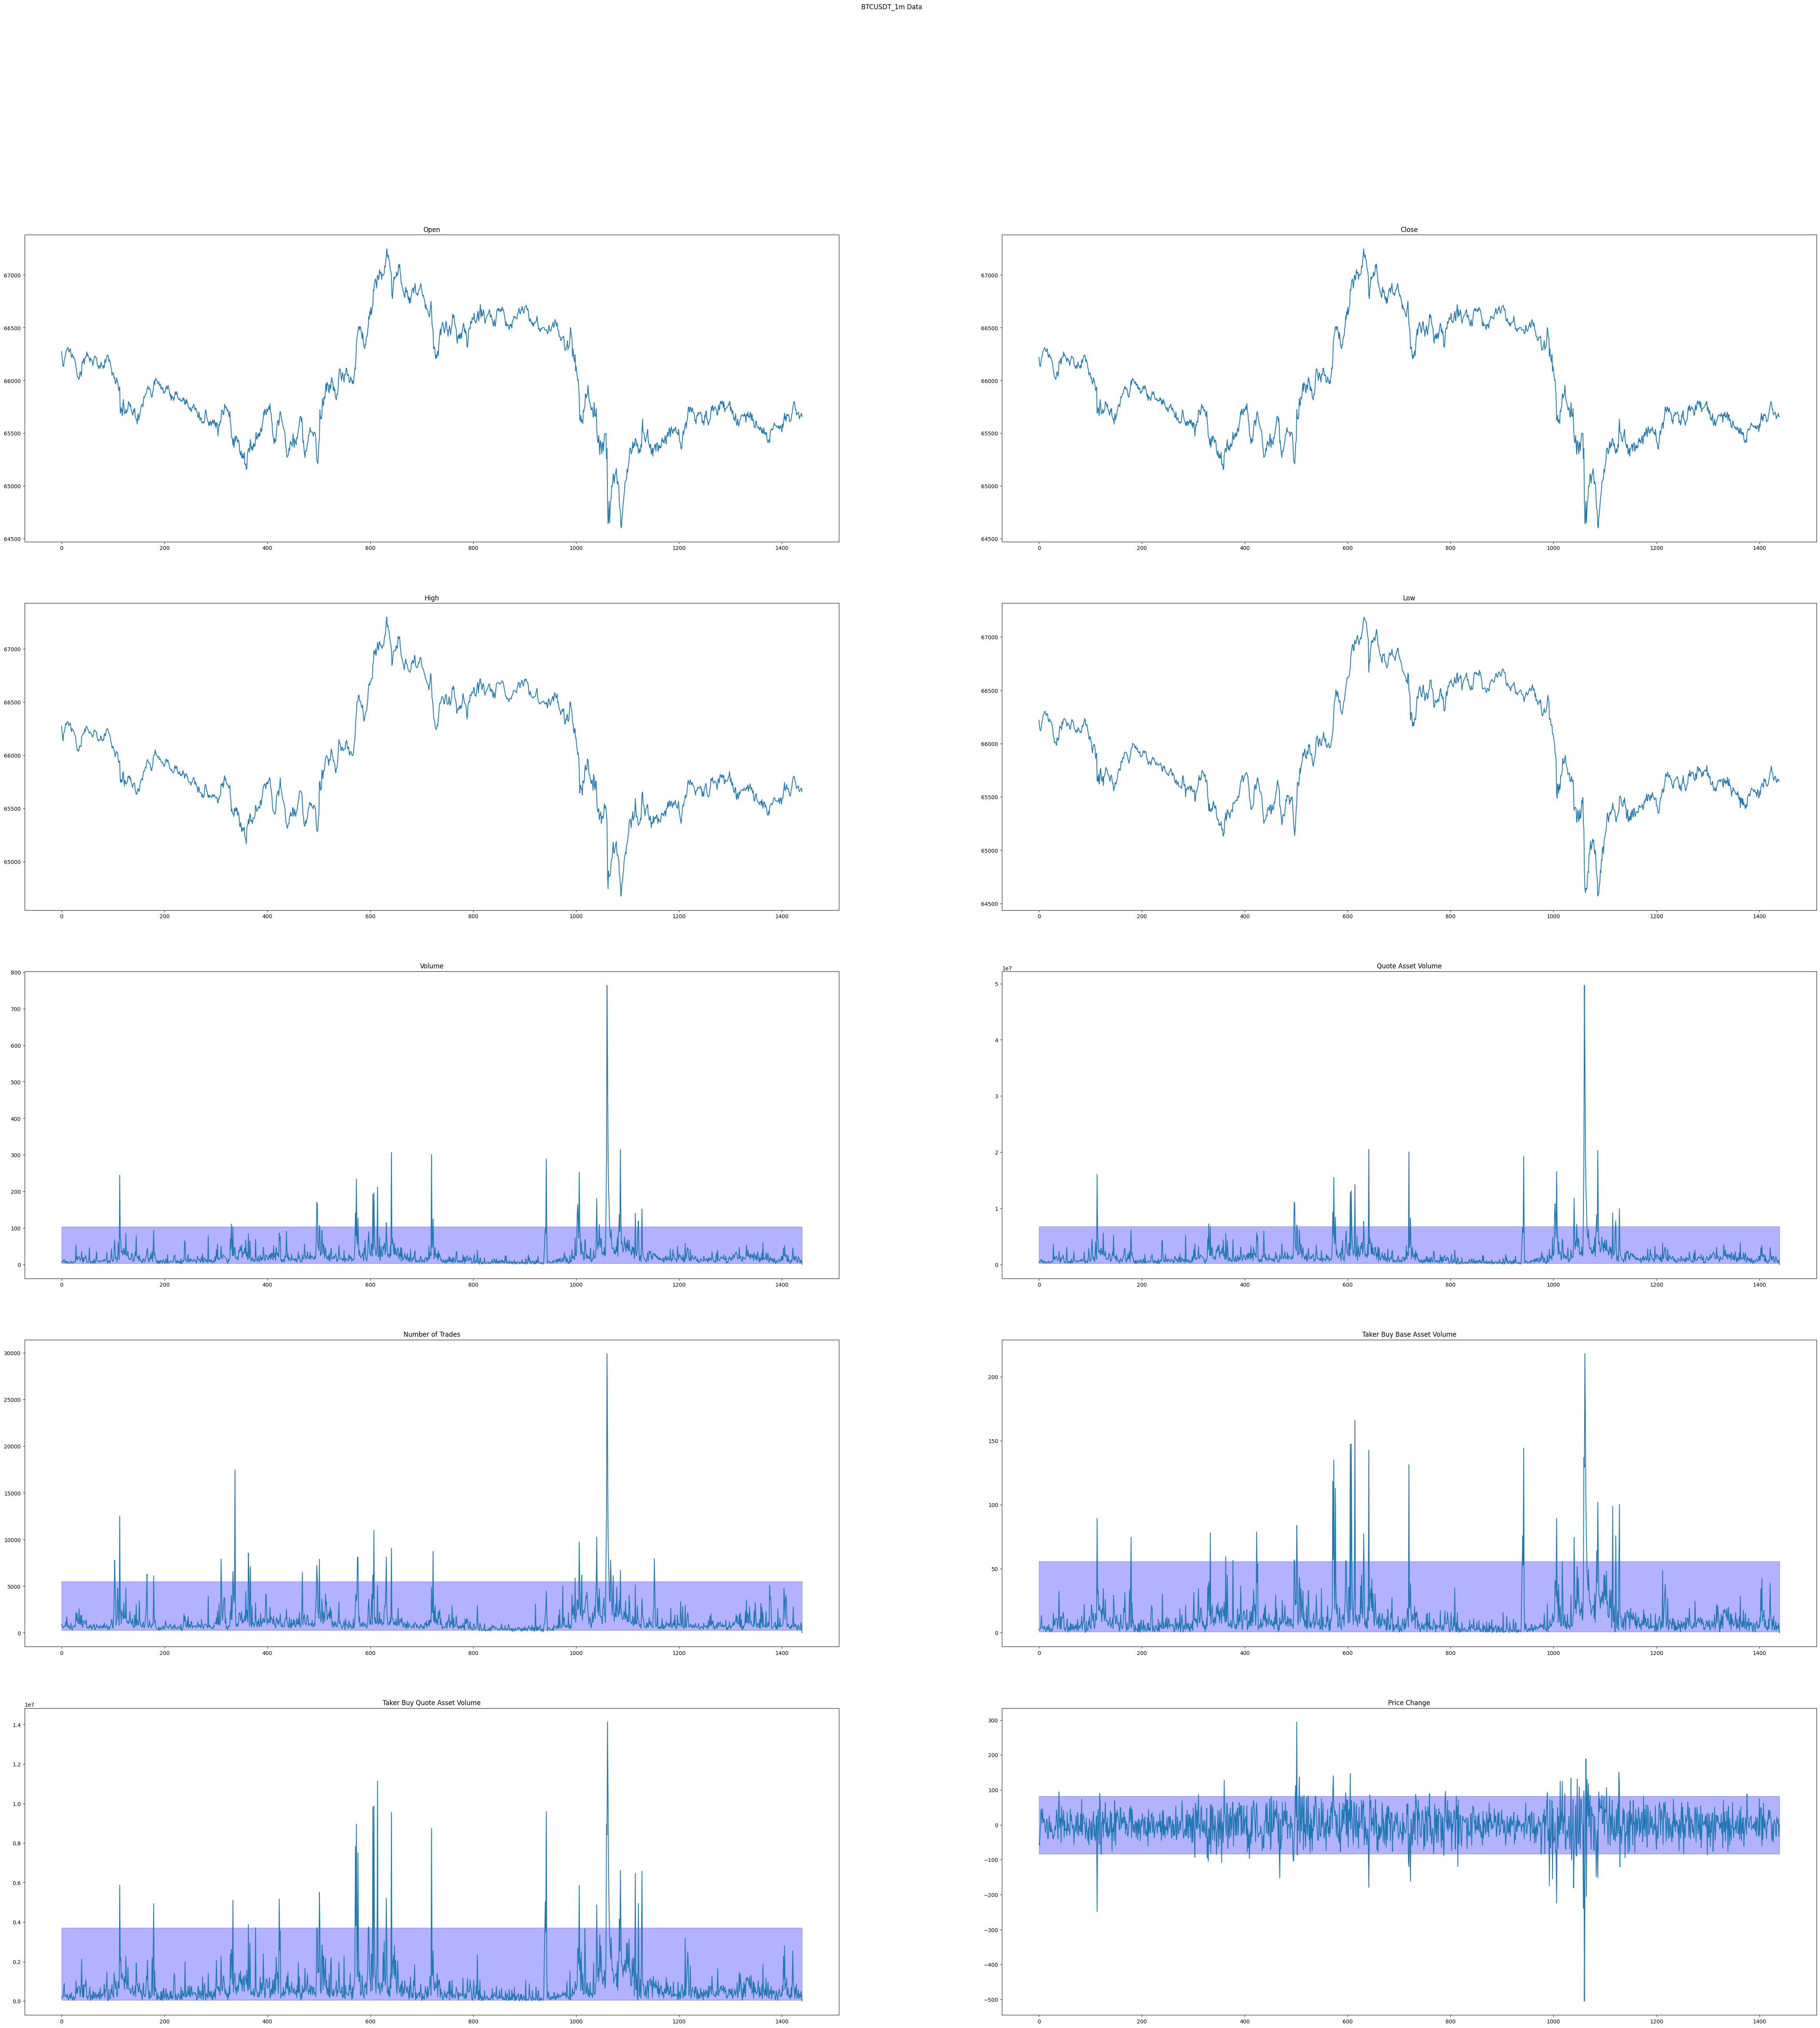

In [6]:

confidence_level = 0.95
lower_quantile = (1 - confidence_level) / 2
upper_quantile = 1 - lower_quantile
# Plot Open, Close, High, Low, Volume, Quote Asset Volume, Number of Trades, Taker Buy Base Asset Volume, Taker Buy Quote Asset Volume, Price Change
fig, axs = plt.subplots(5, 2, figsize=(60, 60))
fig.suptitle("BTCUSDT_1m Data")
axs[0, 0].plot(df["Open"])
axs[0, 0].set_title("Open")
axs[0, 1].plot(df["Close"])
axs[0, 1].set_title("Close")
axs[1, 0].plot(df["High"])
axs[1, 0].set_title("High")
axs[1, 1].plot(df["Low"])
axs[1, 1].set_title("Low")
axs[2, 0].plot(df["Volume"])
axs[2, 0].fill_between(df.index, df["Volume"].quantile(lower_quantile), df["Volume"].quantile(upper_quantile), alpha=0.3, color='blue')
axs[2, 0].set_title("Volume")
axs[2, 1].plot(df["Quote Asset Volume"])
axs[2, 1].fill_between(df.index, df["Quote Asset Volume"].quantile(lower_quantile), df["Quote Asset Volume"].quantile(upper_quantile), alpha=0.3, color='blue')
axs[2, 1].set_title("Quote Asset Volume")
axs[3, 0].plot(df["Number of Trades"])
axs[3, 0].fill_between(df.index, df["Number of Trades"].quantile(lower_quantile), df["Number of Trades"].quantile(upper_quantile), alpha=0.3, color='blue')
axs[3, 0].set_title("Number of Trades")
axs[3, 1].plot(df["Taker Buy Base Asset Volume"])
axs[3, 1].fill_between(df.index, df["Taker Buy Base Asset Volume"].quantile(lower_quantile), df["Taker Buy Base Asset Volume"].quantile(upper_quantile), alpha=0.3, color='blue')
axs[3, 1].set_title("Taker Buy Base Asset Volume")
axs[4, 0].plot(df["Taker Buy Quote Asset Volume"])
axs[4, 0].fill_between(df.index, df["Taker Buy Quote Asset Volume"].quantile(lower_quantile), df["Taker Buy Quote Asset Volume"].quantile(upper_quantile), alpha=0.3, color='blue')
axs[4, 0].set_title("Taker Buy Quote Asset Volume")
axs[4, 1].plot(price_change)
axs[4, 1].fill_between(df.index, price_change.quantile(lower_quantile), price_change.quantile(upper_quantile), alpha=0.3, color='blue')
axs[4, 1].set_title("Price Change")

plt.show()


C:\Users\Daniil\AppData\Local\Temp\ipykernel_8960\2411954442.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '874.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  res[global_outliers] = global_fill_value


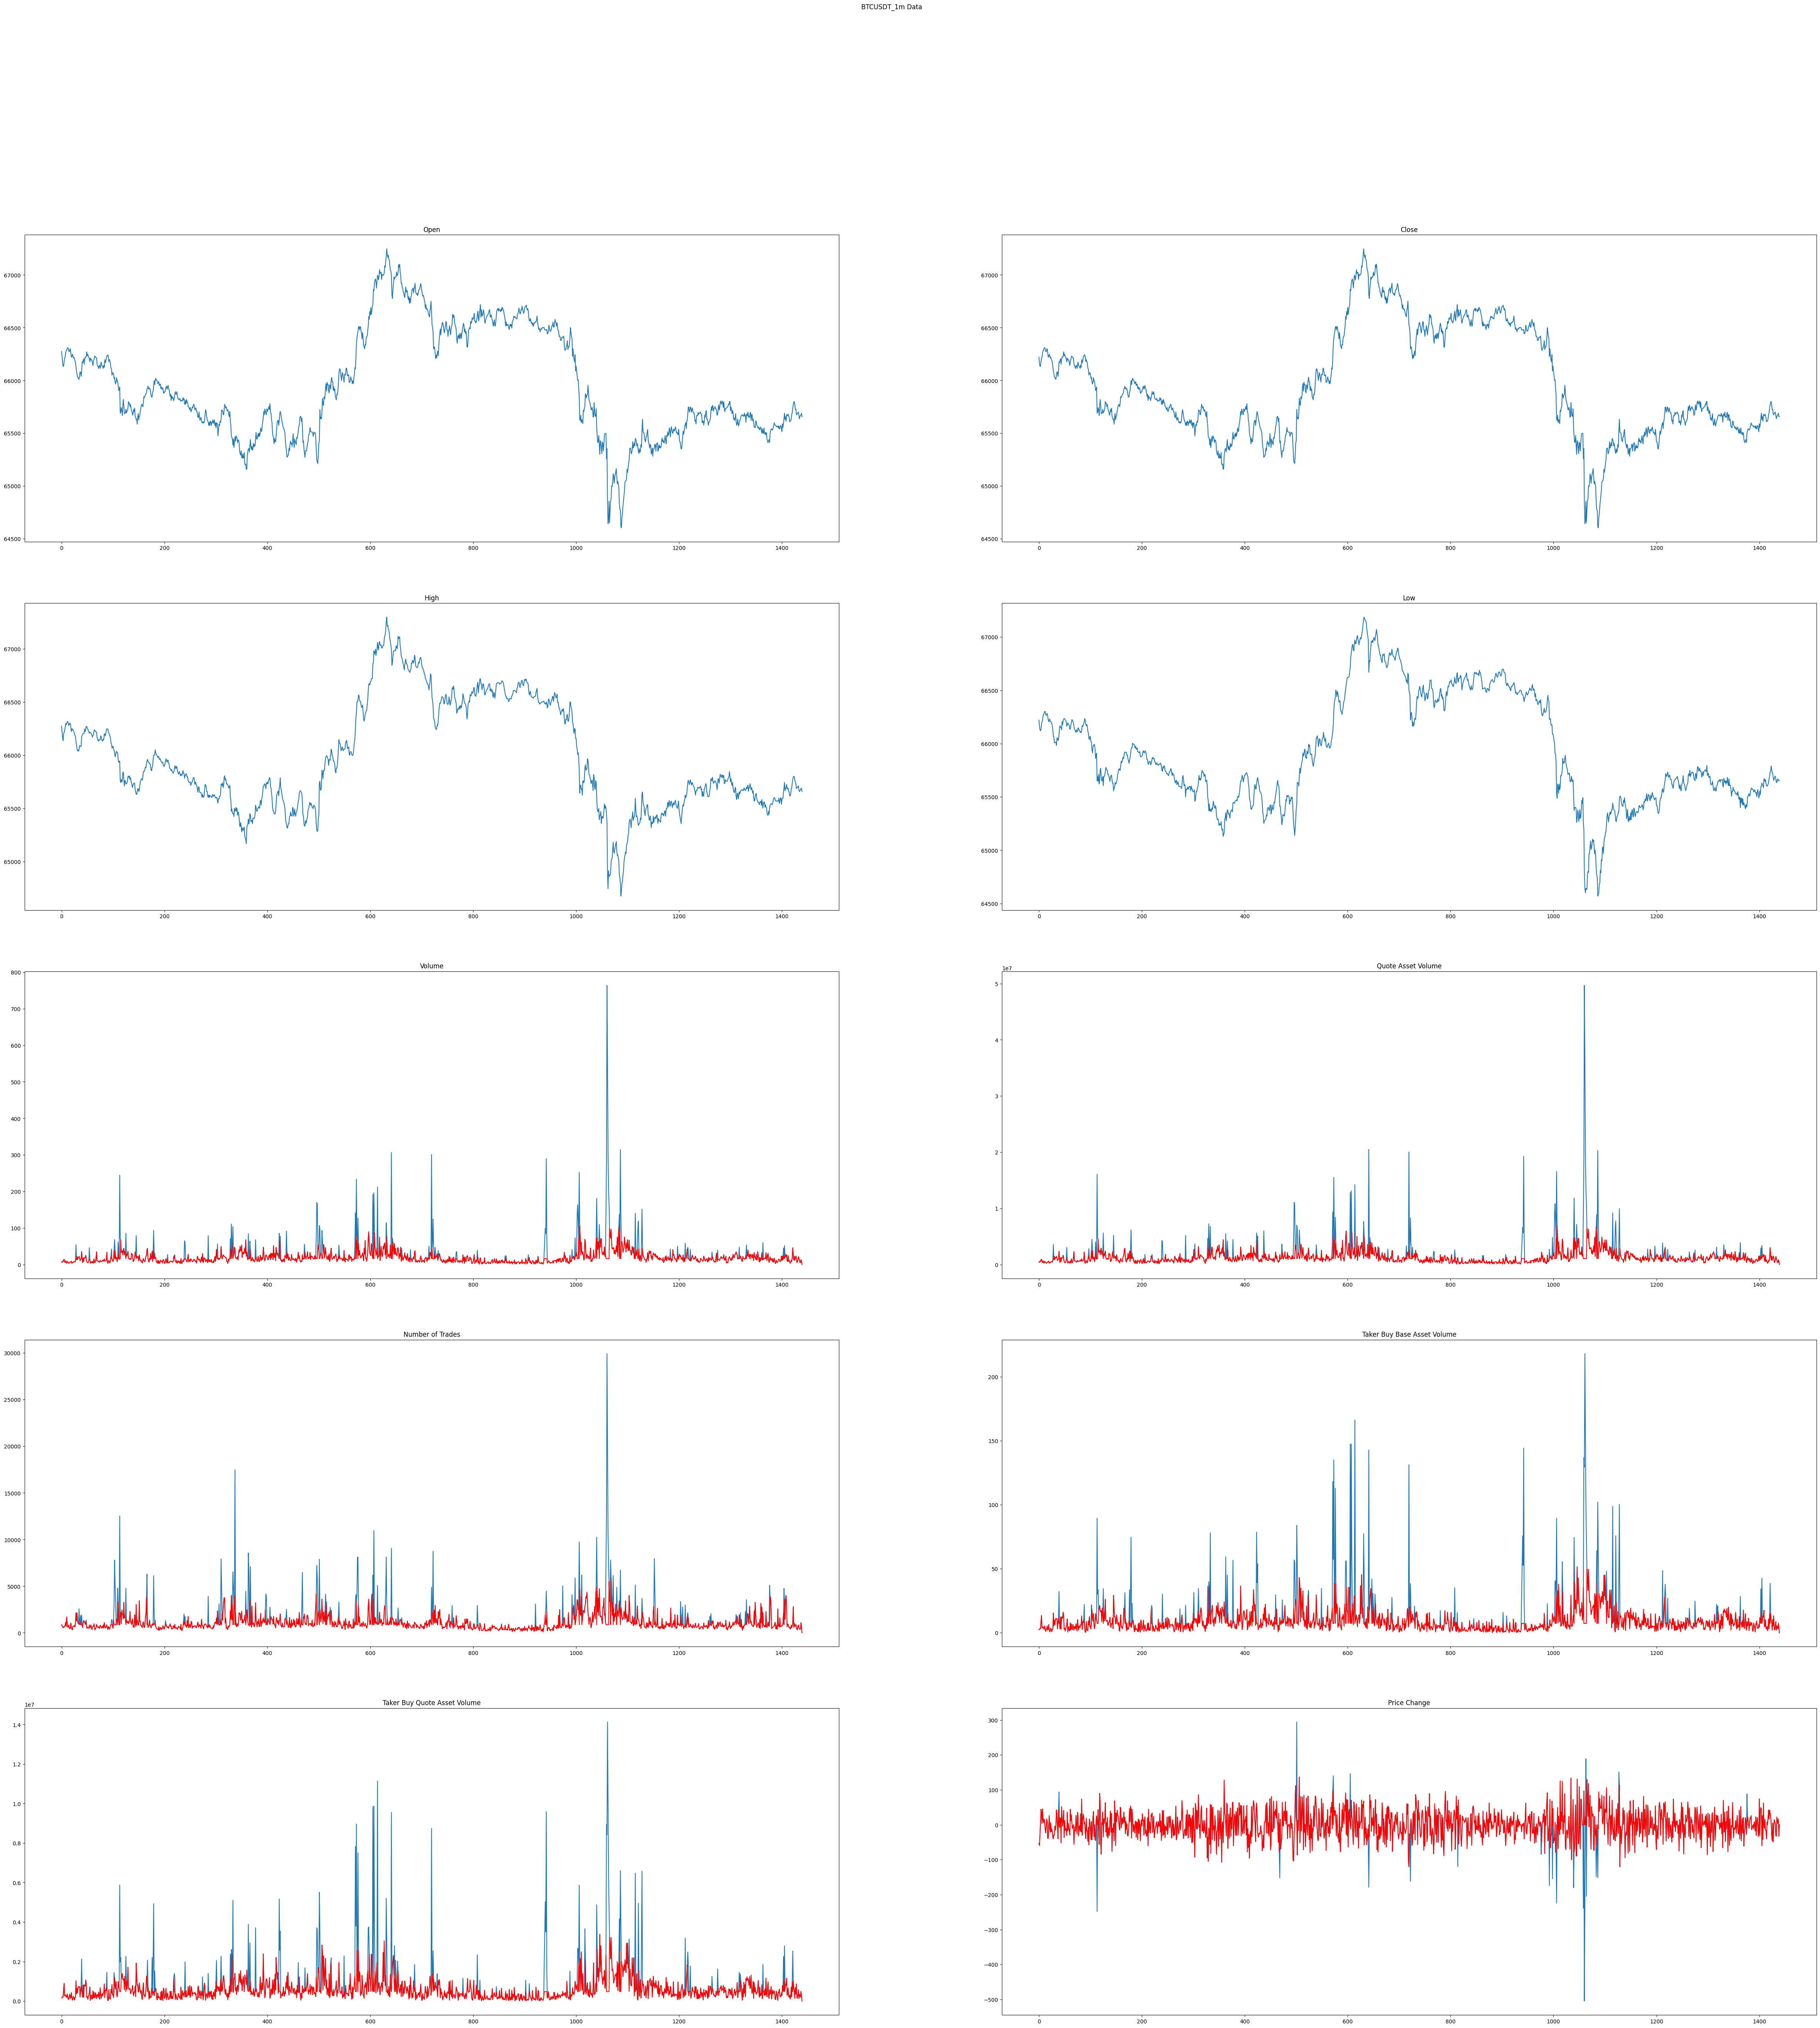

In [7]:
# Find outliers in Volume, Quote Asset Volume, Number of Trades, Taker Buy Base Asset Volume, Taker Buy Quote Asset Volume, Price Change
Volume_cleaned, Volume_outliers = clean_outliers(df["Volume"], window_size=50, fill_method="median")
Quote_Asset_Volume_cleaned, Quote_Asset_Volume_outliers = clean_outliers(df["Quote Asset Volume"], window_size=50, fill_method="median")
Number_of_Trades_cleaned, Number_of_Trades_outliers = clean_outliers(df["Number of Trades"], window_size=50, fill_method="median")
Taker_Buy_Base_Asset_Volume_cleaned, Taker_Buy_Base_Asset_Volume_outliers = clean_outliers(df["Taker Buy Base Asset Volume"], window_size=50, fill_method="median")
Taker_Buy_Quote_Asset_Volume_cleaned, Taker_Buy_Quote_Asset_Volume_outliers = clean_outliers(df["Taker Buy Quote Asset Volume"], window_size=50, fill_method="median")
Price_Change_cleaned, Price_Change_outliers = clean_outliers(price_change, window_size=50, fill_method="median")

# Plot data
fig, axs = plt.subplots(5, 2, figsize=(60, 60))
fig.suptitle("BTCUSDT_1m Data")
axs[0, 0].plot(df["Open"])
axs[0, 0].set_title("Open")
axs[0, 1].plot(df["Close"])
axs[0, 1].set_title("Close")
axs[1, 0].plot(df["High"])
axs[1, 0].set_title("High")
axs[1, 1].plot(df["Low"])
axs[1, 1].set_title("Low")
axs[2, 0].plot(df["Volume"])
axs[2, 0].plot(Volume_cleaned, color='red')  # Add cleaned data plot
axs[2, 0].set_title("Volume")
axs[2, 1].plot(df["Quote Asset Volume"])
axs[2, 1].plot(Quote_Asset_Volume_cleaned, color='red')  # Add cleaned data plot
axs[2, 1].set_title("Quote Asset Volume")
axs[3, 0].plot(df["Number of Trades"])
axs[3, 0].plot(Number_of_Trades_cleaned, color='red')  # Add cleaned data plot
axs[3, 0].set_title("Number of Trades")
axs[3, 1].plot(df["Taker Buy Base Asset Volume"])
axs[3, 1].plot(Taker_Buy_Base_Asset_Volume_cleaned, color='red')  # Add cleaned data plot
axs[3, 1].set_title("Taker Buy Base Asset Volume")
axs[4, 0].plot(df["Taker Buy Quote Asset Volume"])
axs[4, 0].plot(Taker_Buy_Quote_Asset_Volume_cleaned, color='red')  # Add cleaned data plot
axs[4, 0].set_title("Taker Buy Quote Asset Volume")
axs[4, 1].plot(price_change)
axs[4, 1].plot(Price_Change_cleaned, color='red')  # Add cleaned data plot
axs[4, 1].set_title("Price Change")

plt.show()

